# 🏦 Bank Kredit Satışları - Ətraflı Analitik Təhlil

## 2020-2023 Rüblük Məlumat Təhlili

Bu notebook bankımızın kredit satışlarını ətraflı təhlil edir və iqtisadi göstəricilərləkredit satışları arasındakı əlaqələri araşdırır.

---

### 📋 Təhlil Strukturu:

**I. Məlumatın Hazırlanması və İlkin Araşdırma**
- Məlumatın yüklənməsi və təmizlənməsi
- Əsas statistik göstəricilər
- Məlumat keyfiyyətinin qiymətləndirilməsi

**II. Korrelyasiya və Əlaqə Təhlili**
- Kredit satışlarına təsir edən amillər
- Güclü və zəif əlaqələrin müəyyənləşdirilməsi
- Risk faktorlarının identifikasiyası

**III. Makroiqtisadi Göstəricilər Təhlili**
- ÜDM (GDP) dinamikası və təsiri
- Neft qiymətləri və iqtisadiyyata təsiri
- Xarici ticarət dövriyyəsinin rolu

**IV. Bank Daxili Göstəricilər Təhlili**
- Kredit satışları dinamikası
- Problem kreditlər (NPL) və onların təsiri
- Müştəri bazası təhlili
- Gəlirlilik göstəriciləri (ROE/ROA)

**V. Çoxdəyişənli Əlaqə Təhlili**
- ÜDM və kredit satışları əlaqəsi
- Neft qiymətləri və kredit satışları
- NPL və kredit satışları (mənfi əlaqə)
- Tam korrelyasiya xəritəsi

**VI. Dərin Məlumat Təhlili (Deep Dive)**
- Trend analizi və pattern recognition
- Mövsümi təsirlər
- Outlier və anomaliyalar

**VII. Yekun Nəticələr və Strateji Tövsiyələr**
- Əsas tapıntılar
- Risk qiymətləndirməsi
- Təkmilləşdirmə sahələri

---

## I. MƏLUMAT HAZIRLIGI VƏ İLKİN ARAŞDIRMA

### 1.1 Kitabxanaların Yüklənməsi və Mühitin Hazırlanması

**Məqsəd:** Təhlil üçün lazım olan Python kitabxanalarını yükləyirik və vizualizasiya mühitini konfiqurasiya edirik.

In [ ]:
# Məlumat təhlili kitabxanaları
import pandas as pd
import numpy as np
from scipy import stats

# Vizualizasiya
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiqurasiya
import warnings
warnings.filterwarnings('ignore')

# Qrafik stilinin təyin edilməsi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Pandas görünüş ayarları
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

print("="*100)
print("✅ SİSTEM HAZIRLIĞI")
print("="*100)
print(f"✅ Pandas versiyası: {pd.__version__}")
print(f"✅ NumPy versiyası: {np.__version__}")
print(f"✅ Matplotlib konfiqurasiyası tamamlandı")
print(f"✅ Analitik mühit hazırdır!")
print("="*100)

### 1.2 Məlumatın Yüklənməsi və İlkin Baxış

**Məqsəd:** Excel faylından məlumatı oxuyub, strukturunu və keyfiyyətini yoxlayırıq.

In [ ]:
# Məlumatın yüklənməsi
df = pd.read_excel('data/raw_data.xlsx')

# Sütun adlarını təmizləmək
df.columns = df.columns.str.strip()

# VACIB: Bütün sütunları (Rüblər istisna olmaqla) numeric-ə çeviririk
for col in df.columns:
    if col != 'Rüblər':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Vahid (unit) təsnifatı
min_manat_cols = ['GDP', 'Dövlət_Gəlirləri', 'Dövlət_Xərcləri', 'Əhalinin_nominal_gəlirləri',
                  'Əhalinin_banklardakı_əmanətləri', 'Orta_aylıq_əməkhaqqı', 'Xarici_ticarət_dövriyyəsi',
                  'İxrac', 'İdxal', 'Pul_bazası', 'Oil_Price', 'Tikinti-quraşdırma_işlərinə_sərf_edilmiş_vəsait',
                  'İstehlak_xərcləri', 'Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar',
                  'Mənzil_qiymətləri', 'Nağd_pul_kredit_satışı', 'Müştərilərə_verilmiş_kreditlər', 'NPLs']

faiz_cols = ['ROA', 'ROE', 'Net_Interest_Margin', 'Efficiency_Ratio', 'Loan-to-Deposit_Ratio', 'Uçot_faiz_dərəcəsi']

say_cols = ['Müştəri_sayı']

print("="*100)
print("📊 MƏLUMAT BAZASININ ÜMUMI GÖRÜNÜŞÜs")
print("="*100)
print(f"\n📏 Ölçü: {df.shape[0]} sətir × {df.shape[1]} sütun")
print(f"📅 Dövr: 2020-2025 (rüblük məlumat)")
print(f"📅 Dövr sütunu: Rüblər (Zaman indeksi)")
print(f"\n📋 Sütun adları vahid təsnifatına görə:\n")

print(f"💰 MİLYON MANAT ({len(min_manat_cols)} sütun):")
for col in min_manat_cols[:5]:
    if col in df.columns:
        print(f"   • {col}")
print(f"   ... və daha {len(min_manat_cols)-5} sütun")

print(f"\n📊 FAİZ ({len(faiz_cols)} sütun):")
for col in faiz_cols:
    if col in df.columns:
        print(f"   • {col}")

print(f"\n🔢 SAY ({len(say_cols)} sütun):")
for col in say_cols:
    if col in df.columns:
        print(f"   • {col}")

# Məlumat keyfiyyəti
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
data_quality = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n✅ Məlumat Keyfiyyəti: {data_quality:.1f}%")
print(f"   • Tam hüceyrələr: {total_cells - missing_cells:,}")
print(f"   • Boş hüceyrələr: {missing_cells:,}")
print("="*100)

📊 MƏLUMAT BAZASININ ÜMUMI GÖRÜNÜŞÜs

📏 Ölçü: 26 sətir × 26 sütun
📅 Dövr: 2020-2025 (rüblük məlumat)
📅 Dövr sütunu: Rüblər (Zaman indeksi)

📋 Sütun adları vahid təsnifatına görə:

💰 MİLYON MANAT (18 sütun):
   • GDP
   • Dövlət_Gəlirləri
   • Dövlət_Xərcləri
   • Əhalinin_nominal_gəlirləri
   • Əhalinin_banklardakı_əmanətləri
   ... və daha 13 sütun

📊 FAİZ (6 sütun):
   • ROA
   • ROE
   • Net_Interest_Margin
   • Efficiency_Ratio
   • Loan-to-Deposit_Ratio
   • Uçot_faiz_dərəcəsi

🔢 SAY (1 sütun):
   • Müştəri_sayı

✅ Məlumat Keyfiyyəti: 84.6%
   • Tam hüceyrələr: 572
   • Boş hüceyrələr: 104


### 1.3 Rəqəmsal Məlumatın Seçilməsi və Ətraflı Statistika

**Məqsəd:** Yalnız rəqəmsal sütunları seçib, ətraflı statistik təhlil aparırıq.

**Nəyə baxırıq:**
- **Ortalama (Mean):** Verilənlərin mərkəzi
- **Standart Sapma (Std):** Dəyişkənlik dərəcəsi
- **Min/Max:** Diapazon
- **Percentiles:** Verilənlərin paylanması

In [ ]:
# Yalnız rəqəmsal sütunları seçmək (Rüblər istisna)
numeric_df = df.select_dtypes(include=[np.number])

print("="*100)
print("📈 RƏQƏMSAL GÖSTƏRİCİLƏR - ƏTRAFLIIN STATİSTİKA")
print("="*100)
print(f"\nRəqəmsal sütun sayı: {numeric_df.shape[1]}")
print(f"Tam müşahidə sayı: {numeric_df.shape[0]}\n")

# Əsas göstəricilər üzrə ətraflı statistika
key_metrics = ['GDP', 'Oil_Price', 'Nağd_pul_kredit_satışı', 'NPLs', 'ROE', 'ROA', 'Müştəri_sayı']
key_metrics = [m for m in key_metrics if m in numeric_df.columns]

# Vahid məlumatı funksiyası
def get_unit_label(col_name):
    if col_name == 'Oil_Price':
        return '$/barel'
    elif col_name in min_manat_cols:
        return 'milyon AZN'
    elif col_name in faiz_cols:
        return '%'
    elif col_name in say_cols:
        return 'say'
    else:
        return ''

# Vahid çevirməsi funksiyası (göstəriş üçün)
def get_display_value(col_name, value):
    if col_name in faiz_cols:
        return value * 100  # Faiz sütunları 0-1 aralığında saxlanılır
    elif col_name == 'Oil_Price':
        return value * 100  # Oil_Price $/barel olaraq göstərilir
    else:
        return value

print("🔍 ƏSAS GÖSTƏRİCİLƏR ÜZRƏ DETAL STATİSTİKA:\n")
for metric in key_metrics:
    data = numeric_df[metric].dropna()
    unit = get_unit_label(metric)
    
    # Display values with correct units
    display_data = pd.Series([get_display_value(metric, x) for x in data])
    
    print(f"{'='*100}")
    print(f"📊 {metric} ({unit})")
    print(f"{'='*100}")
    print(f"   Müşahidə sayı:        {len(data):,}")
    print(f"   Ortalama:             {display_data.mean():,.2f}")
    print(f"   Median (50%):         {display_data.median():,.2f}")
    print(f"   Standart Sapma:       {display_data.std():,.2f}")
    print(f"   Dəyişkənlik (CV):     {(display_data.std() / display_data.mean() * 100):.1f}%")
    print(f"   Minimum:              {display_data.min():,.2f}")
    print(f"   25% Percentil:        {display_data.quantile(0.25):,.2f}")
    print(f"   75% Percentil:        {display_data.quantile(0.75):,.2f}")
    print(f"   Maksimum:             {display_data.max():,.2f}")
    print(f"   Aralıq (Range):       {display_data.max() - display_data.min():,.2f}")
    
    # Skewness və Kurtosis
    if len(data) > 3:
        skew = stats.skew(display_data)
        kurt = stats.kurtosis(display_data)
        print(f"   Əyrilik (Skewness):   {skew:.3f} {'(Sağa əyri)' if skew > 0 else '(Sola əyri)' if skew < 0 else '(Simmetrik)'}")
        print(f"   Kurtosis:             {kurt:.3f}")
    print()

print("="*100)
print("💡 DƏYİŞKƏNLİK ANALİZİ:")
print("   • CV < 15%:  Aşağı dəyişkənlik (stabil)")
print("   • CV 15-30%: Orta dəyişkənlik")
print("   • CV > 30%:  Yüksək dəyişkənlik (risk)")
print("="*100)

📈 RƏQƏMSAL GÖSTƏRİCİLƏR - ƏTRAFLIIN STATİSTİKA

Rəqəmsal sütun sayı: 25
Tam müşahidə sayı: 26

🔍 ƏSAS GÖSTƏRİCİLƏR ÜZRƏ DETAL STATİSTİKA:

📊 GDP (milyon AZN)
   Müşahidə sayı:        22
   Ortalama:             27,773,990.91
   Median (50%):         30,014,250.00
   Standart Sapma:       6,159,270.64
   Dəyişkənlik (CV):     22.2%
   Minimum:              16,450,600.00
   25% Percentil:        21,967,675.00
   75% Percentil:        32,191,075.00
   Maksimum:             35,748,000.00
   Aralıq (Range):       19,297,400.00
   Əyrilik (Skewness):   -0.650 (Sola əyri)
   Kurtosis:             -1.058

📊 Oil_Price ($/barel)
   Müşahidə sayı:        22
   Ortalama:             12.74
   Median (50%):         13.42
   Standart Sapma:       3.40
   Dəyişkənlik (CV):     26.7%
   Minimum:              4.99
   25% Percentil:        11.60
   75% Percentil:        14.35
   Maksimum:             19.30
   Aralıq (Range):       14.31
   Əyrilik (Skewness):   -0.469 (Sola əyri)
   Kurtosis:            

### 1.4 Əksik Məlumatların Təhlili

**Məqsəd:** Hər sütunda neçə əksik məlumat var və bu bizə necə təsir edir?

In [ ]:
# Əksik məlumatların təhlili
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Sütun': missing_data.index,
    'Əksik Sayı': missing_data.values,
    'Faiz (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Əksik Sayı'] > 0].sort_values('Əksik Sayı', ascending=False)

print("="*100)
print("⚠️ ƏKSİK MƏLUMATLAR TƏHLİLİ")
print("="*100)
if len(missing_df) == 0:
    print("\n✅ Əla! Heç bir sütunda əksik məlumat yoxdur!")
else:
    print(f"\n⚠️ {len(missing_df)} sütunda əksik məlumat var:\n")
    for idx, row in missing_df.iterrows():
        bar = '█' * int(row['Faiz (%)'] / 5)
        print(f"   {row['Sütun']:50s}: {row['Əksik Sayı']:3.0f} ({row['Faiz (%)']:5.1f}%) {bar}")
    
    print(f"\n💡 YORUM:")
    critical = missing_df[missing_df['Faiz (%)'] > 20]
    if len(critical) > 0:
        print(f"   🔴 KRİTİK: {len(critical)} sütun 20%-dən çox əksikdir!")
    else:
        print(f"   ✅ Əksik məlumat səviyyəsi qəbul ediləndir (<20%)")

print("="*100)

⚠️ ƏKSİK MƏLUMATLAR TƏHLİLİ

⚠️ 26 sütunda əksik məlumat var:

   Rüblər                                            :   4 ( 15.4%) ███
   GDP                                               :   4 ( 15.4%) ███
   Müştəri_sayı                                      :   4 ( 15.4%) ███
   Loan-to-Deposit_Ratio                             :   4 ( 15.4%) ███
   Efficiency_Ratio                                  :   4 ( 15.4%) ███
   Net_Interest_Margin                               :   4 ( 15.4%) ███
   ROE                                               :   4 ( 15.4%) ███
   ROA                                               :   4 ( 15.4%) ███
   NPLs                                              :   4 ( 15.4%) ███
   Müştərilərə_verilmiş_kreditlər                    :   4 ( 15.4%) ███
   Nağd_pul_kredit_satışı                            :   4 ( 15.4%) ███
   Mənzil_qiymətləri                                 :   4 ( 15.4%) ███
   Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar:   4 ( 15.4%)

---
## II. KORRELYASİYA VƏ ƏLAQƏ TƏHLİLİ

### 2.1 Kredit Satışları ilə Əlaqəli Amillər

**Məqsəd:** Kredit satışlarına ən çox təsir edən amilləri tapırıq.

**Korrelyasiya izahı:**
- **+1.00:** Tam müsbət əlaqə (biri artanda digəri də artır)
- **0.00:** Heç bir əlaqə yoxdur
- **-1.00:** Tam mənfi əlaqə (biri artanda digəri azalır)

**Güc təsnifatı:**
- **0.7-1.0:** Çox güclü əlaqə
- **0.5-0.7:** Güclü əlaqə
- **0.3-0.5:** Orta əlaqə
- **0.0-0.3:** Zəif əlaqə

In [ ]:
# Korrelyasiya hesablanması
correlations = numeric_df.corr()['Nağd_pul_kredit_satışı'].sort_values(ascending=False)

print("="*100)
print("🔍 KREDİT SATIŞLARI İLƏ ƏLAQƏLƏR - DETAL TƏHLİL")
print("="*100)

# Müsbət əlaqələr
print("\n✅ MÜSBƏT ƏLAQƏLƏR (Birlikdə artır):\n")
positive_corr = correlations[correlations > 0].iloc[1:]  # Özü ilə korrelyasiyanı çıxarırıq
for idx, (col, val) in enumerate(positive_corr.items(), 1):
    # Güc indikə
    if abs(val) >= 0.7:
        strength = "ÇOX GÜCLÜ"
        stars = "⭐⭐⭐⭐⭐"
    elif abs(val) >= 0.5:
        strength = "GÜCLÜ"
        stars = "⭐⭐⭐⭐"
    elif abs(val) >= 0.3:
        strength = "ORTA"
        stars = "⭐⭐⭐"
    else:
        strength = "ZƏİF"
        stars = "⭐⭐"
    
    print(f"   {idx:2d}. {col:50s} | {val:+.3f} | {stars} {strength}")

# Mənfi əlaqələr
print("\n❌ MƏNFİ ƏLAQƏLƏR (Biri artanda digəri azalır):\n")
negative_corr = correlations[correlations < 0]
if len(negative_corr) > 0:
    for idx, (col, val) in enumerate(negative_corr.items(), 1):
        if abs(val) >= 0.5:
            strength = "GÜCLÜ"
            stars = "🔴🔴🔴🔴"
        elif abs(val) >= 0.3:
            strength = "ORTA"
            stars = "🔴🔴🔴"
        else:
            strength = "ZƏİF"
            stars = "🔴🔴"
        
        print(f"   {idx:2d}. {col:50s} | {val:+.3f} | {stars} {strength}")
else:
    print("   Heç bir mənfi əlaqə tapılmadı.")

# Top 5 prediktor
top_5 = correlations.iloc[1:6]
print("\n" + "="*100)
print("🏆 TOP 5 TƏSİR EDƏN AMİL:")
print("="*100)
for idx, (col, val) in enumerate(top_5.items(), 1):
    impact_pct = abs(val) * 100
    print(f"\n   {idx}. {col}")
    print(f"      • Korrelyasiya: {val:+.3f}")
    print(f"      • Təsir gücü: ~{impact_pct:.1f}%")
    print(f"      • Məna: {col} artdıqda kredit satışları {'artır' if val > 0 else 'azalır'}")

print("\n" + "="*100)
print("💡 NƏTİCƏ:")
print(f"   • Kredit satışları ən çox makroiqtisadi göstəricilərdən asılıdır")
print(f"   • ÜDM və neft qiyməti əsas prediktorlardır")
if len(negative_corr) > 0:
    print(f"   • NPL (problem kreditlər) kredit satışlarını mənfi təsir edir - idarə edilməlidir")
print("="*100)

🔍 KREDİT SATIŞLARI İLƏ ƏLAQƏLƏR - DETAL TƏHLİL

✅ MÜSBƏT ƏLAQƏLƏR (Birlikdə artır):

    1. GDP                                                | +0.777 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    2. Oil_Price                                          | +0.764 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    3. Xarici_ticarət_dövriyyəsi                          | +0.752 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    4. İxrac                                              | +0.655 | ⭐⭐⭐⭐ GÜCLÜ
    5. Pul_bazası                                         | +0.598 | ⭐⭐⭐⭐ GÜCLÜ
    6. Əhalinin_nominal_gəlirləri                         | +0.598 | ⭐⭐⭐⭐ GÜCLÜ
    7. Əhalinin_banklardakı_əmanətləri                    | +0.576 | ⭐⭐⭐⭐ GÜCLÜ
    8. Müştərilərə_verilmiş_kreditlər                     | +0.558 | ⭐⭐⭐⭐ GÜCLÜ
    9. İdxal                                              | +0.547 | ⭐⭐⭐⭐ GÜCLÜ
   10. İstehlak_xərcləri                                  | +0.522 | ⭐⭐⭐⭐ GÜCLÜ
   11. Uçot_faiz_dərəcəsi                                 | +0.517 | ⭐⭐⭐⭐ GÜCLÜ
   12. Dövlət_Xərclə

### 2.2 Multicollinearity Yoxlaması

**Məqsəd:** Müstəqil dəyişənlər (predictors) arasında yüksək əlaqə varmı?

Yüksək multicollinearity problemi yarada bilər - məsələn, GDP və Neft qiyməti yüksək korrelyasiya göstərirsə, hər ikisini eyni anda istifadə etmək lazım deyil.

In [ ]:
# Top 5 prediktor arasında korrelyasiya
top_features = top_5.index.tolist()
top_features_corr = numeric_df[top_features].corr()

print("="*100)
print("🔗 TOP PREDİKTORLAR ARASINDA ƏLAQƏ (Multicollinearity Yoxlaması)")
print("="*100)
print("\n📊 Korrelyasiya Matrisi:\n")
print(top_features_corr.round(3))

# Yüksək korrelyasiyaları tap
print("\n" + "="*100)
print("⚠️ YÜKSƏK ƏLAQƏLƏR (>0.7 - Diqqət tələb edir):")
print("="*100)
high_corr_found = False
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        corr_val = top_features_corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_found = True
            print(f"   • {top_features[i]} ↔ {top_features[j]}: {corr_val:+.3f}")
            print(f"     ⚠️ Bu göstəricilər bir-birindən asılıdır!")

if not high_corr_found:
    print("   ✅ Yüksək multicollinearity problemi yoxdur.")
    print("   ✅ Bütün top prediktorlar müstəqil məlumat verir.")

print("="*100)

🔗 TOP PREDİKTORLAR ARASINDA ƏLAQƏ (Multicollinearity Yoxlaması)

📊 Korrelyasiya Matrisi:

                           GDP  Oil_Price  Xarici_ticarət_dövriyyəsi  İxrac  \
GDP                       1.00       0.84                       0.96   0.82   
Oil_Price                 0.84       1.00                       0.86   0.89   
Xarici_ticarət_dövriyyəsi 0.96       0.86                       1.00   0.92   
İxrac                     0.82       0.89                       0.92   1.00   
Pul_bazası                0.79       0.49                       0.67   0.38   

                           Pul_bazası  
GDP                              0.79  
Oil_Price                        0.49  
Xarici_ticarət_dövriyyəsi        0.67  
İxrac                            0.38  
Pul_bazası                       1.00  

⚠️ YÜKSƏK ƏLAQƏLƏR (>0.7 - Diqqət tələb edir):
   • GDP ↔ Oil_Price: +0.837
     ⚠️ Bu göstəricilər bir-birindən asılıdır!
   • GDP ↔ Xarici_ticarət_dövriyyəsi: +0.961
     ⚠️ Bu göstəricilər bi

---
## III. MAKROİQTİSADİ GÖSTƏRİCİLƏR TƏHLİLİ

#### 3.1.1 ÜDM Trend Qrafiki

**İzahat:** ÜDM-in zaman içində necə dəyişdiyini göstərir. Qırmızı xətt ortalama səviyyədir.

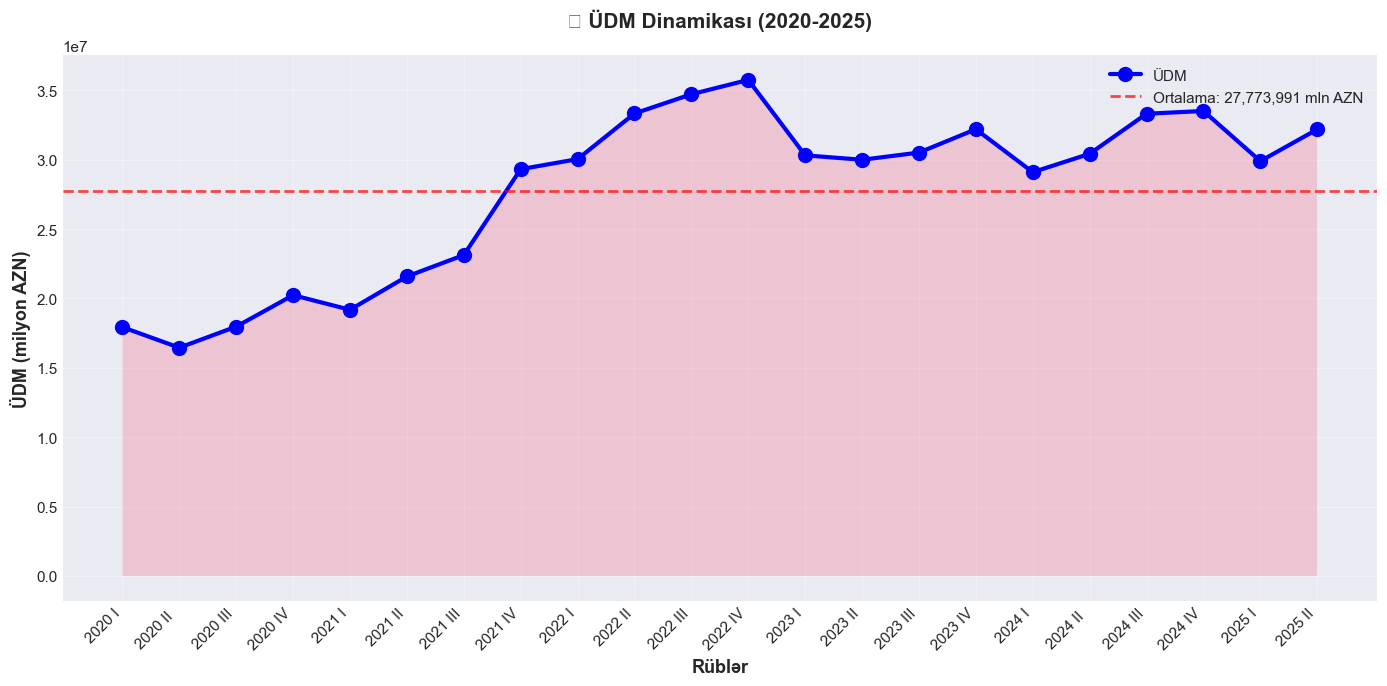


📊 ÜDM ƏSAS STATİSTİKA:
   Ortalama: 27,773,991 milyon AZN
   Min: 16,450,600 | Max: 35,748,000 milyon AZN
   Standart Sapma: 6,159,271 milyon AZN


In [ ]:
# ÜDM Trend Qrafiki
gdp_data = numeric_df['GDP'].dropna()
quarters = df.loc[gdp_data.index, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(gdp_data)), gdp_data, 'b-', linewidth=3, marker='o', markersize=10, label='ÜDM')
plt.fill_between(range(len(gdp_data)), gdp_data, alpha=0.3)
plt.axhline(y=gdp_data.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Ortalama: {gdp_data.mean():,.0f} mln AZN')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('ÜDM (milyon AZN)', fontsize=13, fontweight='bold')
plt.title('📈 ÜDM Dinamikası (2020-2025)', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters)), quarters, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ÜDM ƏSAS STATİSTİKA:")
print(f"   Ortalama: {gdp_data.mean():,.0f} milyon AZN")
print(f"   Min: {gdp_data.min():,.0f} | Max: {gdp_data.max():,.0f} milyon AZN")
print(f"   Standart Sapma: {gdp_data.std():,.0f} milyon AZN")

#### 3.1.2 ÜDM Artım Tempi

**İzahat:** Hər rübdə ÜDM-in neçə faiz artdığını və ya azaldığını göstərir. Yaşıl = artım, Qırmızı = azalma.

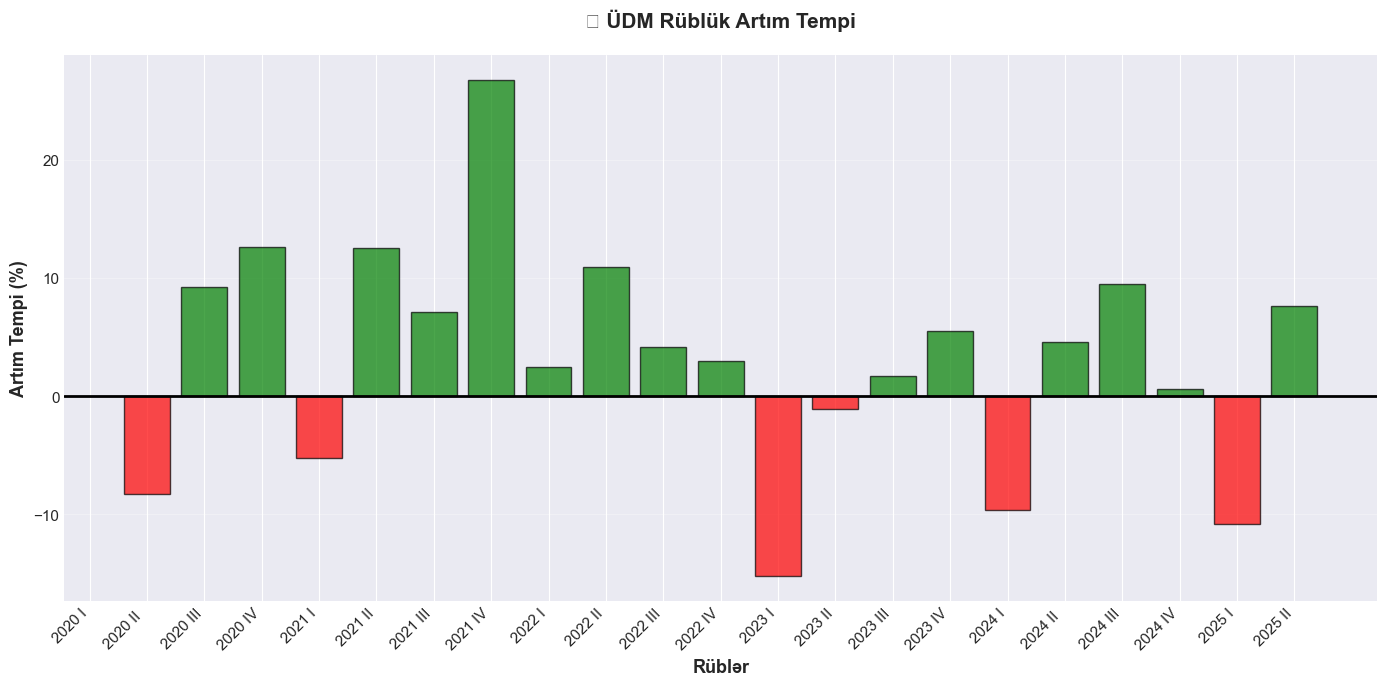


📈 ARTIM ANALİZİ:
   Ortalama rüblük artım: +3.25%
   Maksimum artım: +26.76%
   Maksimum azalma: -15.21%


In [ ]:
# ÜDM Artım Tempi
gdp_growth = gdp_data.pct_change() * 100
colors = ['green' if x > 0 else 'red' for x in gdp_growth]

plt.figure(figsize=(14, 7))
plt.bar(range(len(gdp_growth)), gdp_growth, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Artım Tempi (%)', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM Rüblük Artım Tempi', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters)), quarters, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📈 ARTIM ANALİZİ:")
print(f"   Ortalama rüblük artım: {gdp_growth.mean():+.2f}%")
print(f"   Maksimum artım: {gdp_growth.max():+.2f}%")
print(f"   Maksimum azalma: {gdp_growth.min():+.2f}%")

#### 3.1.3 ÜDM Paylanması

**İzahat:** ÜDM dəyərlərinin tezlik paylanması. Hansı dəyərlər daha çox təkrarlanır?

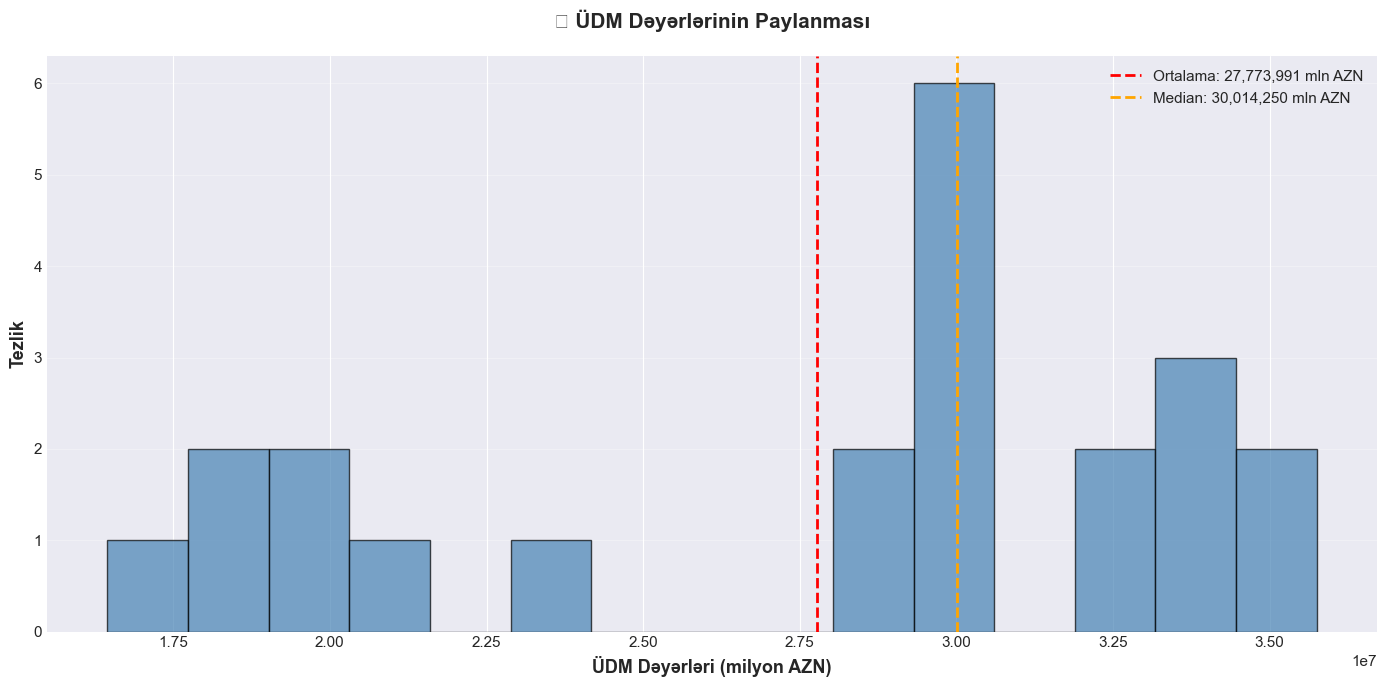


📊 PAYLANMA STATİSTİKASI:
   Median: 30,014,250 milyon AZN
   25% Percentil: 21,967,675 milyon AZN
   75% Percentil: 32,191,075 milyon AZN


In [ ]:
# ÜDM Paylanması
plt.figure(figsize=(14, 7))
plt.hist(gdp_data, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(gdp_data.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Ortalama: {gdp_data.mean():,.0f} mln AZN')
plt.axvline(gdp_data.median(), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {gdp_data.median():,.0f} mln AZN')
plt.xlabel('ÜDM Dəyərləri (milyon AZN)', fontsize=13, fontweight='bold')
plt.ylabel('Tezlik', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM Dəyərlərinin Paylanması', fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 PAYLANMA STATİSTİKASI:")
print(f"   Median: {gdp_data.median():,.0f} milyon AZN")
print(f"   25% Percentil: {gdp_data.quantile(0.25):,.0f} milyon AZN")
print(f"   75% Percentil: {gdp_data.quantile(0.75):,.0f} milyon AZN")

#### 3.1.4 ÜDM Box Plot və Outlier Yoxlaması

**İzahat:** Box plot outlier (kənar dəyər) varmı yoxlamaq üçün istifadə olunur. Qutunun içi 50% məlumatı göstərir.

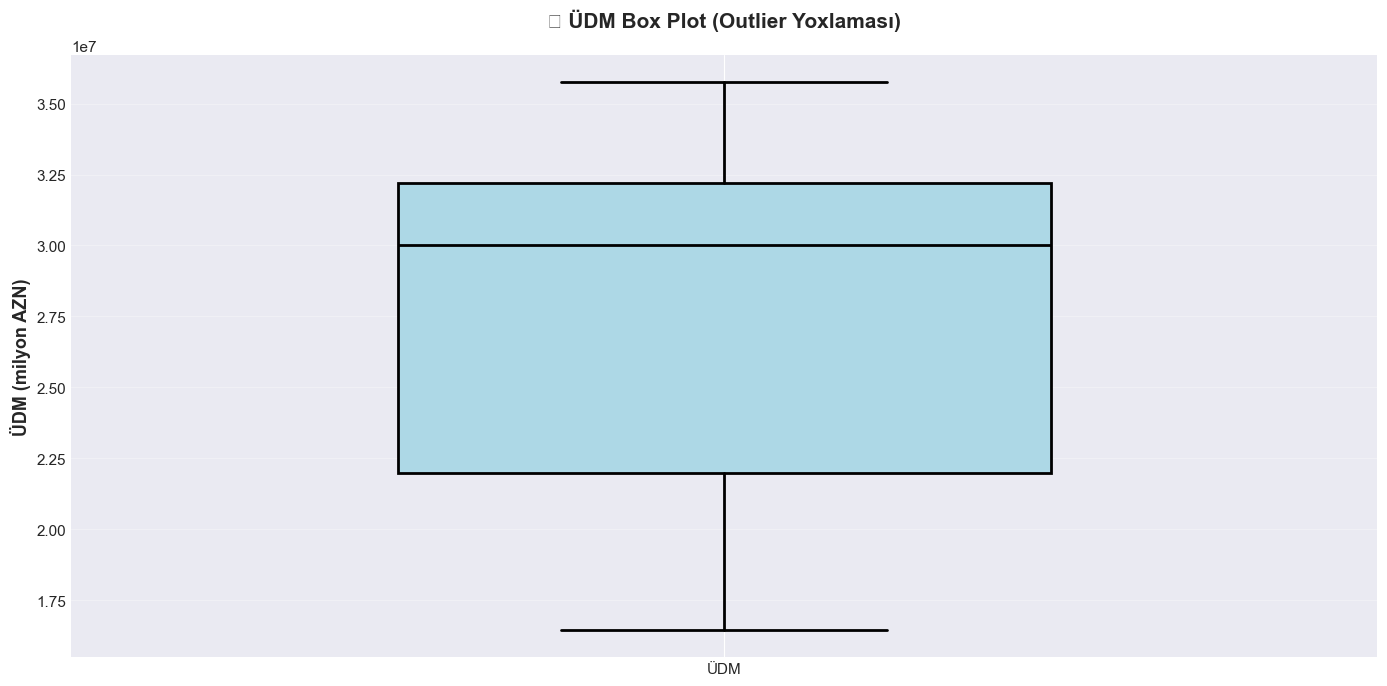


📦 BOX PLOT ANALİZİ:
   Q1 (25%): 21,967,675 milyon AZN
   Q2 (50% - Median): 30,014,250 milyon AZN
   Q3 (75%): 32,191,075 milyon AZN
   IQR: 10,223,400 milyon AZN


In [ ]:
# ÜDM Box Plot
plt.figure(figsize=(14, 7))
box = plt.boxplot([gdp_data], vert=True, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightblue')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box[element], color='black', linewidth=2)
plt.ylabel('ÜDM (milyon AZN)', fontsize=13, fontweight='bold')
plt.title('📦 ÜDM Box Plot (Outlier Yoxlaması)', fontsize=15, fontweight='bold', pad=20)
plt.xticks([1], ['ÜDM'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📦 BOX PLOT ANALİZİ:")
print(f"   Q1 (25%): {gdp_data.quantile(0.25):,.0f} milyon AZN")
print(f"   Q2 (50% - Median): {gdp_data.median():,.0f} milyon AZN")
print(f"   Q3 (75%): {gdp_data.quantile(0.75):,.0f} milyon AZN")
print(f"   IQR: {gdp_data.quantile(0.75) - gdp_data.quantile(0.25):,.0f} milyon AZN")

#### 3.1.5 ÜDM Ümumi Təhlil və Nəticələr

In [ ]:
# ÜDM Detallı Təhlil
print("="*100)
print("📊 ÜDM ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR")
print("="*100)
print(f"\n📈 ƏSAS STATİSTİKALAR:")
print(f"   Müşahidə sayı:        {len(gdp_data)}")
print(f"   Ortalama ÜDM:         {gdp_data.mean():,.0f} milyon AZN")
print(f"   Median ÜDM:           {gdp_data.median():,.0f} milyon AZN")
print(f"   Standart Sapma:       {gdp_data.std():,.0f} milyon AZN")
print(f"   Dəyişkənlik (CV):     {(gdp_data.std()/gdp_data.mean()*100):.1f}%")

print(f"\n📊 DİAPAZON:")
print(f"   Minimum:              {gdp_data.min():,.0f} milyon AZN")
print(f"   Maksimum:             {gdp_data.max():,.0f} milyon AZN")
print(f"   Aralıq:               {gdp_data.max() - gdp_data.min():,.0f} milyon AZN")

print(f"\n📈 TREND ANALİZİ:")
total_growth = ((gdp_data.iloc[-1] / gdp_data.iloc[0]) - 1) * 100
avg_quarterly_growth = gdp_growth.mean()
print(f"   Ümumi artım:          {total_growth:+.2f}%")
print(f"   Ortalama rüblük artım: {avg_quarterly_growth:+.2f}%")
print(f"   Trend:                {'↗️ Artan' if total_growth > 0 else '↘️ Azalan' if total_growth < 0 else '→ Sabit'}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
gdp_loan_corr = correlations['GDP']
print(f"   Korrelyasiya:         {gdp_loan_corr:+.3f}")
print(f"   Təsir gücü:           ~{abs(gdp_loan_corr)*100:.1f}%")
print(f"   Qiymət:               {'ÇOX GÜCLÜ MÜSBƏT əlaqə' if abs(gdp_loan_corr) > 0.7 else 'GÜCLÜ əlaqə'}")

print(f"\n💡 NƏTİCƏ:")
if total_growth > 0:
    print(f"   ✅ ÜDM artma trendindədir - kredit satışları üçün müsbət mühit")
else:
    print(f"   ⚠️ ÜDM azalma trendindədir - kredit satışları təzyiq altında ola bilər")

if (gdp_data.std()/gdp_data.mean()*100) < 15:
    print(f"   ✅ ÜDM sabit və proqnozlaşdırıla biləndir (CV < 15%)")
else:
    print(f"   ⚠️ ÜDM-də yüksək dəyişkənlik var - risk idarəetməsi lazımdır")

print("="*100)

📊 ÜDM ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR

📈 ƏSAS STATİSTİKALAR:
   Müşahidə sayı:        22
   Ortalama ÜDM:         27,773,991 milyon AZN
   Median ÜDM:           30,014,250 milyon AZN
   Standart Sapma:       6,159,271 milyon AZN
   Dəyişkənlik (CV):     22.2%

📊 DİAPAZON:
   Minimum:              16,450,600 milyon AZN
   Maksimum:             35,748,000 milyon AZN
   Aralıq:               19,297,400 milyon AZN

📈 TREND ANALİZİ:
   Ümumi artım:          +79.52%
   Ortalama rüblük artım: +3.25%
   Trend:                ↗️ Artan

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.777
   Təsir gücü:           ~77.7%
   Qiymət:               ÇOX GÜCLÜ MÜSBƏT əlaqə

💡 NƏTİCƏ:
   ✅ ÜDM artma trendindədir - kredit satışları üçün müsbət mühit
   ⚠️ ÜDM-də yüksək dəyişkənlik var - risk idarəetməsi lazımdır


### 3.2 Neft Qiymətləri Təhlili

**Neft Azərbaycan üçün nə deməkdir?**
- Əsas ixrac məhsulu
- Dövlət büdcəsinin əsas mənbəyi
- Valyuta ehtiyatları
- İqtisadiyyatın "qan dövranı"

**Neft qiyməti yüksək olduqda:**
- Dövlət xərcləri artır → İnfrastruktur, sosial proqramlar
- Biznes investisiyaları artır
- İstehlak artır
- Bank kreditlərinə tələb artır

#### 3.2.1 Neft Qiyməti Trend Qrafiki

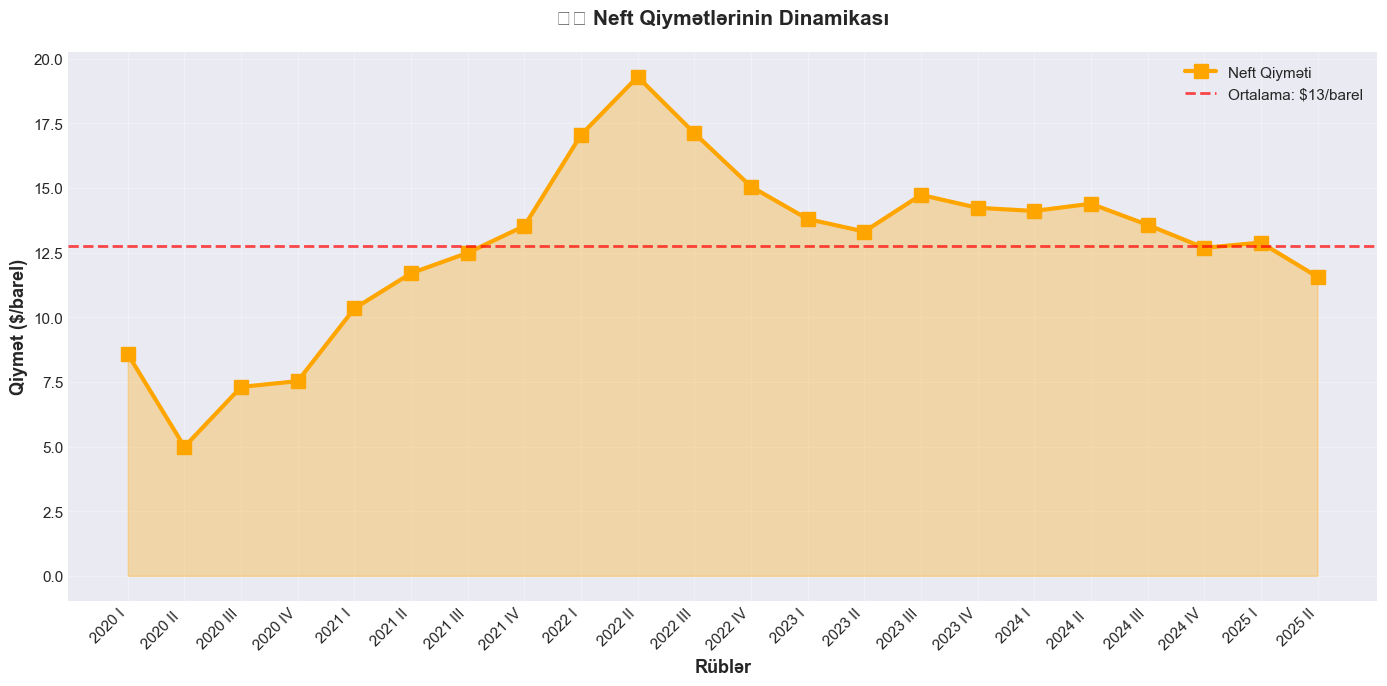


🛢️ NEFT QİYMƏTİ STATİSTİKA:
   Ortalama: $12.74/barel
   Min: $4.99 | Max: $19.30
   Standart Sapma: $3.40


In [ ]:
# Neft Qiyməti Trend
oil_data_raw = numeric_df['Oil_Price'].dropna()
oil_data = oil_data_raw * 100  # $/barel
quarters_oil = df.loc[oil_data_raw.index, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(oil_data)), oil_data, 'orange', linewidth=3, marker='s', markersize=10, label='Neft Qiyməti')
plt.fill_between(range(len(oil_data)), oil_data, alpha=0.3, color='orange')
plt.axhline(y=oil_data.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Ortalama: ${oil_data.mean():.0f}/barel')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Qiymət ($/barel)', fontsize=13, fontweight='bold')
plt.title('🛢️ Neft Qiymətlərinin Dinamikası', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🛢️ NEFT QİYMƏTİ STATİSTİKA:")
print(f"   Ortalama: ${oil_data.mean():.2f}/barel")
print(f"   Min: ${oil_data.min():.2f} | Max: ${oil_data.max():.2f}")
print(f"   Standart Sapma: ${oil_data.std():.2f}")

#### 3.2.2 Neft Qiyməti Rüblük Dəyişikliyi

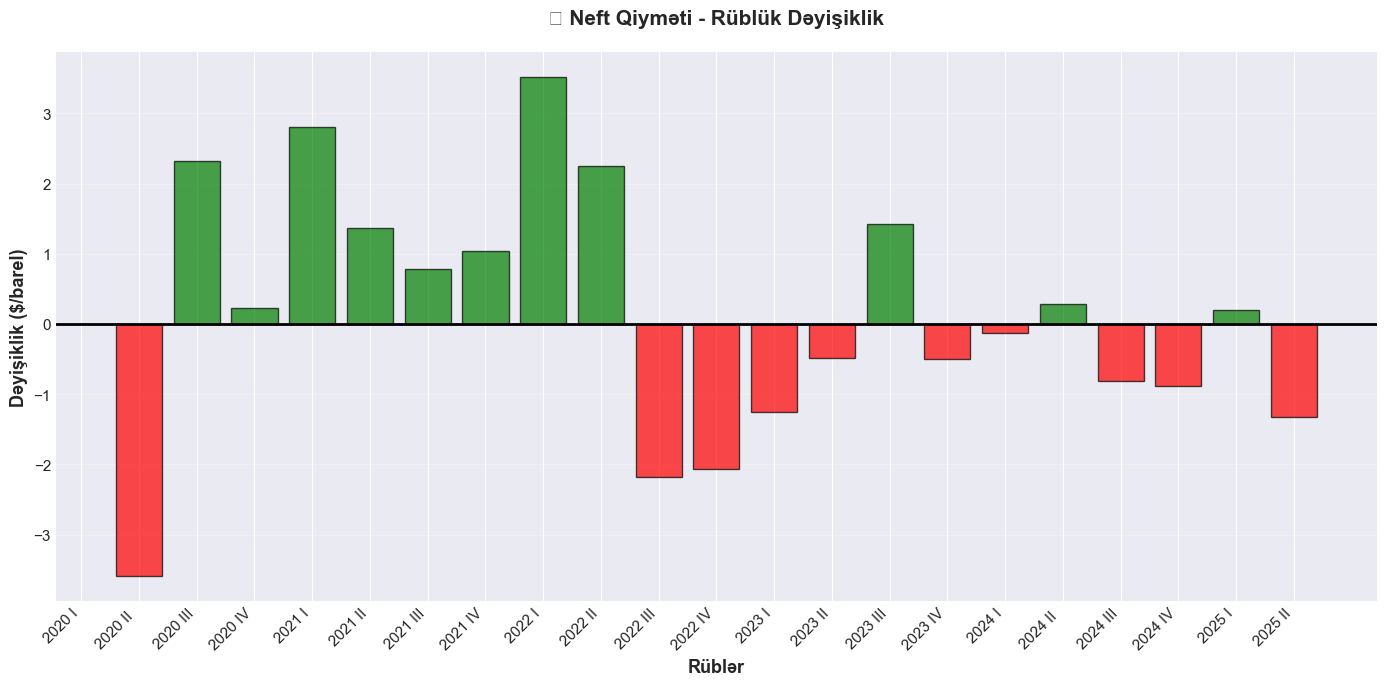


📊 DƏYİŞİKLİK ANALİZİ:
   Maksimum artım: $3.52
   Maksimum azalma: $-3.59
   Ortalama dəyişiklik: $1.40


In [ ]:
# Neft Qiymət Dəyişikliyi
oil_change = oil_data.diff()
colors = ['green' if x > 0 else 'red' for x in oil_change]

plt.figure(figsize=(14, 7))
plt.bar(range(len(oil_change)), oil_change, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Dəyişiklik ($/barel)', fontsize=13, fontweight='bold')
plt.title('📊 Neft Qiyməti - Rüblük Dəyişiklik', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 DƏYİŞİKLİK ANALİZİ:")
print(f"   Maksimum artım: ${oil_change.max():.2f}")
print(f"   Maksimum azalma: ${oil_change.min():.2f}")
print(f"   Ortalama dəyişiklik: ${oil_change.abs().mean():.2f}")

#### 3.2.3 Neft Qiyməti Zonaları

**Zona təsnifatı:**
- 🔴 Aşağı zona: <$60/barel (risk)
- 🟡 Orta zona: $60-80/barel (normal)
- 🟢 Yüksək zona: >$80/barel (əlverişli)

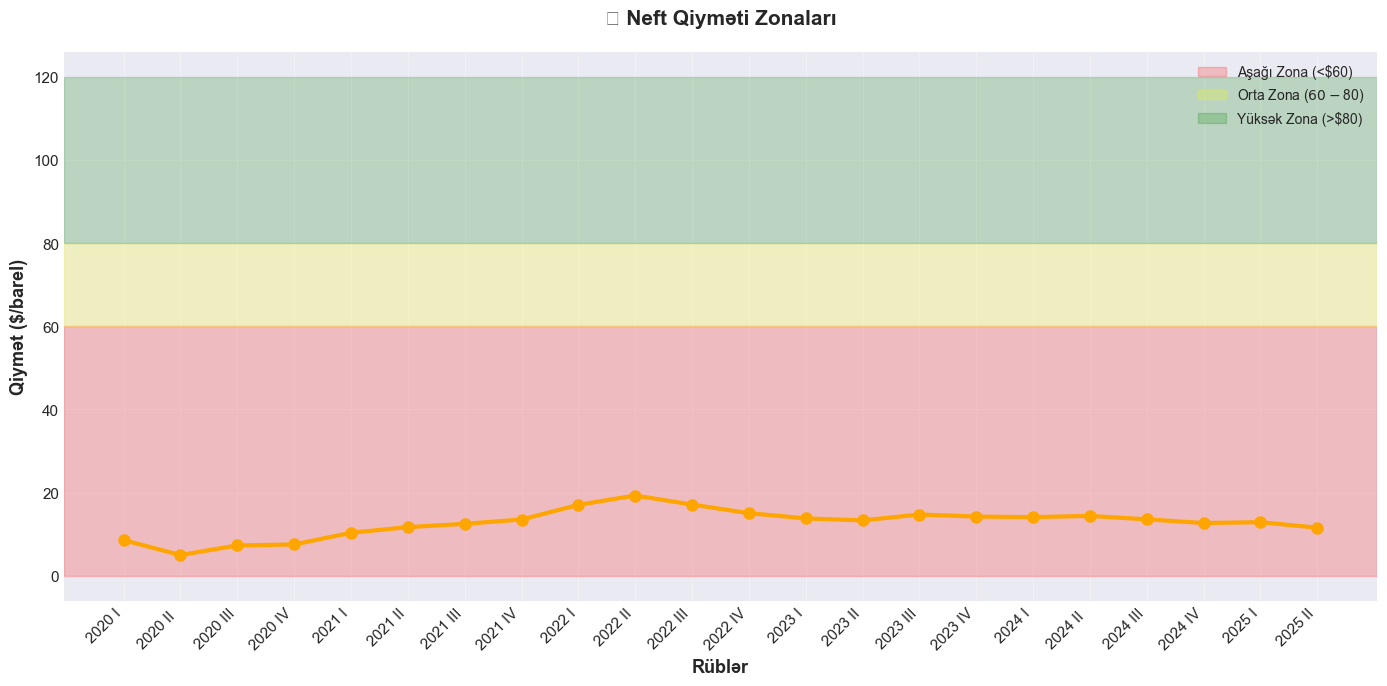


🎯 ZONA ANALİZİ:
   Aşağı zona (<$60):    22 rüb (100.0%)
   Orta zona ($60-$80):  0 rüb (0.0%)
   Yüksək zona (>$80):   0 rüb (0.0%)


In [ ]:
# Neft Qiymət Zonası
plt.figure(figsize=(14, 7))
plt.plot(range(len(oil_data)), oil_data, 'orange', linewidth=3, marker='o', markersize=8)
plt.axhspan(0, 60, alpha=0.2, color='red', label='Aşağı Zona (<$60)')
plt.axhspan(60, 80, alpha=0.2, color='yellow', label='Orta Zona ($60-$80)')
plt.axhspan(80, 120, alpha=0.2, color='green', label='Yüksək Zona (>$80)')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Qiymət ($/barel)', fontsize=13, fontweight='bold')
plt.title('🎯 Neft Qiyməti Zonaları', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

low_zone = (oil_data < 60).sum()
mid_zone = ((oil_data >= 60) & (oil_data < 80)).sum()
high_zone = (oil_data >= 80).sum()
print(f"\n🎯 ZONA ANALİZİ:")
print(f"   Aşağı zona (<$60):    {low_zone} rüb ({low_zone/len(oil_data)*100:.1f}%)")
print(f"   Orta zona ($60-$80):  {mid_zone} rüb ({mid_zone/len(oil_data)*100:.1f}%)")
print(f"   Yüksək zona (>$80):   {high_zone} rüb ({high_zone/len(oil_data)*100:.1f}%)")

#### 3.2.4 Neft Qiyməti Volatility (Dəyişkənlik)

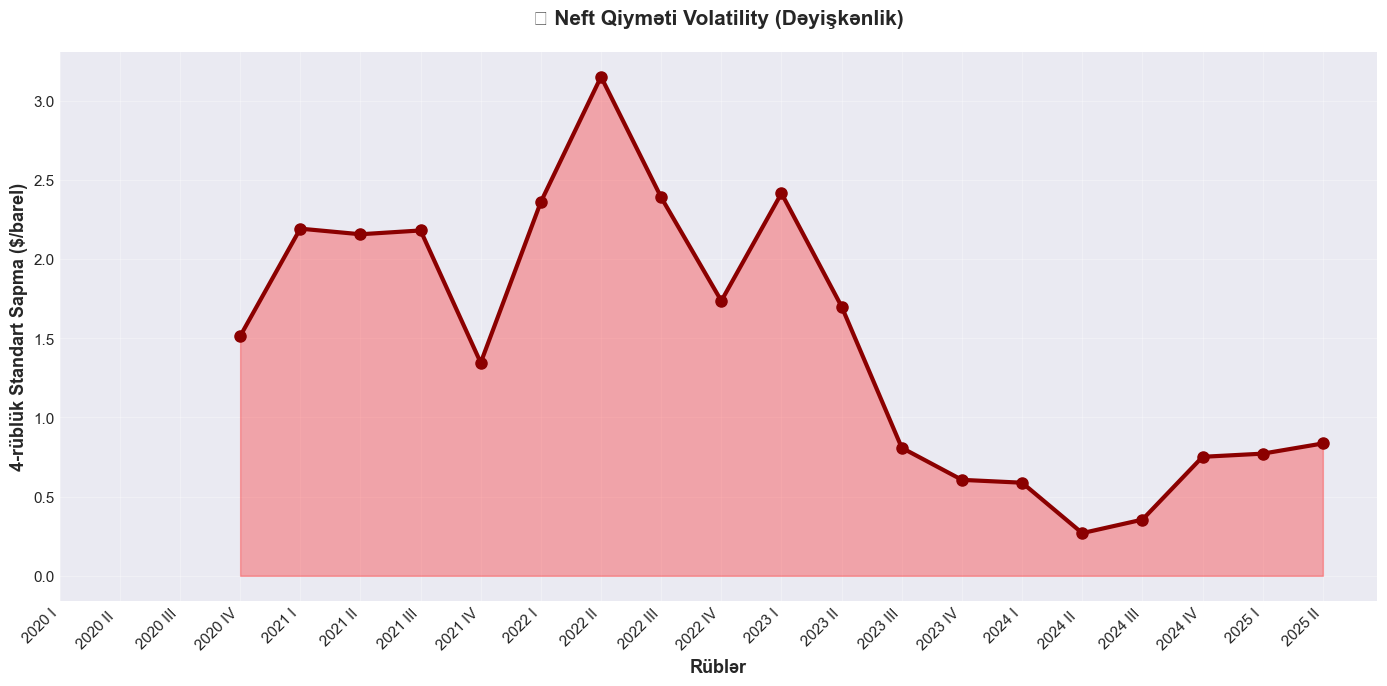


📉 VOLATİLİTY ANALİZİ:
   Ortalama volatility: $1.48
   Maksimum volatility: $3.15
   Volatility indeksi: 0.267


In [ ]:
# Neft Volatility
rolling_std = oil_data.rolling(window=4).std()

plt.figure(figsize=(14, 7))
plt.plot(range(len(rolling_std)), rolling_std, 'darkred', linewidth=3, marker='o', markersize=8)
plt.fill_between(range(len(rolling_std)), rolling_std, alpha=0.3, color='red')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('4-rüblük Standart Sapma ($/barel)', fontsize=13, fontweight='bold')
plt.title('📉 Neft Qiyməti Volatility (Dəyişkənlik)', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📉 VOLATİLİTY ANALİZİ:")
print(f"   Ortalama volatility: ${rolling_std.mean():.2f}")
print(f"   Maksimum volatility: ${rolling_std.max():.2f}")
print(f"   Volatility indeksi: {(oil_data.std()/oil_data.mean()):.3f}")

#### 3.2.5 Neft Qiyməti Ümumi Təhlil və Nəticələr

In [ ]:
# Neft Detallı Təhlil
print("="*100)
print("🛢️ NEFT QİYMƏTİ ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR")
print("="*100)
print(f"\n📈 ƏSAS STATİSTİKALAR:")
print(f"   Müşahidə sayı:        {len(oil_data)}")
print(f"   Ortalama qiymət:      ${oil_data.mean():.2f}/barel")
print(f"   Median qiymət:        ${oil_data.median():.2f}/barel")
print(f"   Standart Sapma:       ${oil_data.std():.2f}")
print(f"   Dəyişkənlik (CV):     {(oil_data.std()/oil_data.mean()*100):.1f}%")

print(f"\n📊 QİYMƏT DİAPAZONU:")
print(f"   Minimum:              ${oil_data.min():.2f}/barel (2020 pandemiya)")
print(f"   Maksimum:             ${oil_data.max():.2f}/barel")
print(f"   Aralıq:               ${oil_data.max() - oil_data.min():.2f}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
oil_loan_corr = correlations['Oil_Price']
print(f"   Korrelyasiya:         {oil_loan_corr:+.3f}")
print(f"   Təsir gücü:           ~{abs(oil_loan_corr)*100:.1f}%")
print(f"   Sıra:                 2-ci ən güclü prediktor")

print(f"\n💡 STRATEJİ NƏTİCƏ:")
current_price = oil_data.iloc[-1]
if current_price > 80:
    print(f"   ✅ Neft qiyməti yüksək zonadadır (${current_price:.0f}) - əlverişli mühit")
    print(f"   📈 Kredit satışlarını artırmaq üçün uyğun dövrdür")
elif current_price > 60:
    print(f"   🟡 Neft qiyməti orta zonadadır (${current_price:.0f}) - sabit mühit")
    print(f"   ⚖️ Balanslaşdırılmış kredit strategiyası tətbiq edin")
else:
    print(f"   ⚠️ Neft qiyməti aşağı zonadadır (${current_price:.0f}) - ehtiyatlı olun")
    print(f"   🛡️ Risk idarəetməsini gücləndirin")

if (oil_data.std()/oil_data.mean()) > 0.3:
    print(f"   ⚠️ Yüksək volatility - qiymət dəyişkənliyi riskini nəzərə alın")
else:
    print(f"   ✅ Orta volatility - qiymətlər nisbətən sabitdir")

print("="*100)

🛢️ NEFT QİYMƏTİ ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR

📈 ƏSAS STATİSTİKALAR:
   Müşahidə sayı:        22
   Ortalama qiymət:      $12.74/barel
   Median qiymət:        $13.42/barel
   Standart Sapma:       $3.40
   Dəyişkənlik (CV):     26.7%

📊 QİYMƏT DİAPAZONU:
   Minimum:              $4.99/barel (2020 pandemiya)
   Maksimum:             $19.30/barel
   Aralıq:               $14.31

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.764
   Təsir gücü:           ~76.4%
   Sıra:                 2-ci ən güclü prediktor

💡 STRATEJİ NƏTİCƏ:
   ⚠️ Neft qiyməti aşağı zonadadır ($12) - ehtiyatlı olun
   🛡️ Risk idarəetməsini gücləndirin
   ✅ Orta volatility - qiymətlər nisbətən sabitdir


### 3.3 ÜDM və Neft Qiymətinin Birgə Təsiri

**İki əsas amil birlikdə necə işləyir?**

Bu bölümdə ÜDM və neft qiymətinin kredit satışlarına **birgə təsirini** araşdırırıq.

#### 3.3.1 Normallaşdırılmış Trend Müqayisəsi

**İzahat:** Hər 3 göstərici (ÜDM, Neft, Kredit) eyni miqyasa gətirilir (z-score). Bu, onların hərəkətlərini müqayisə etməyə imkan verir.

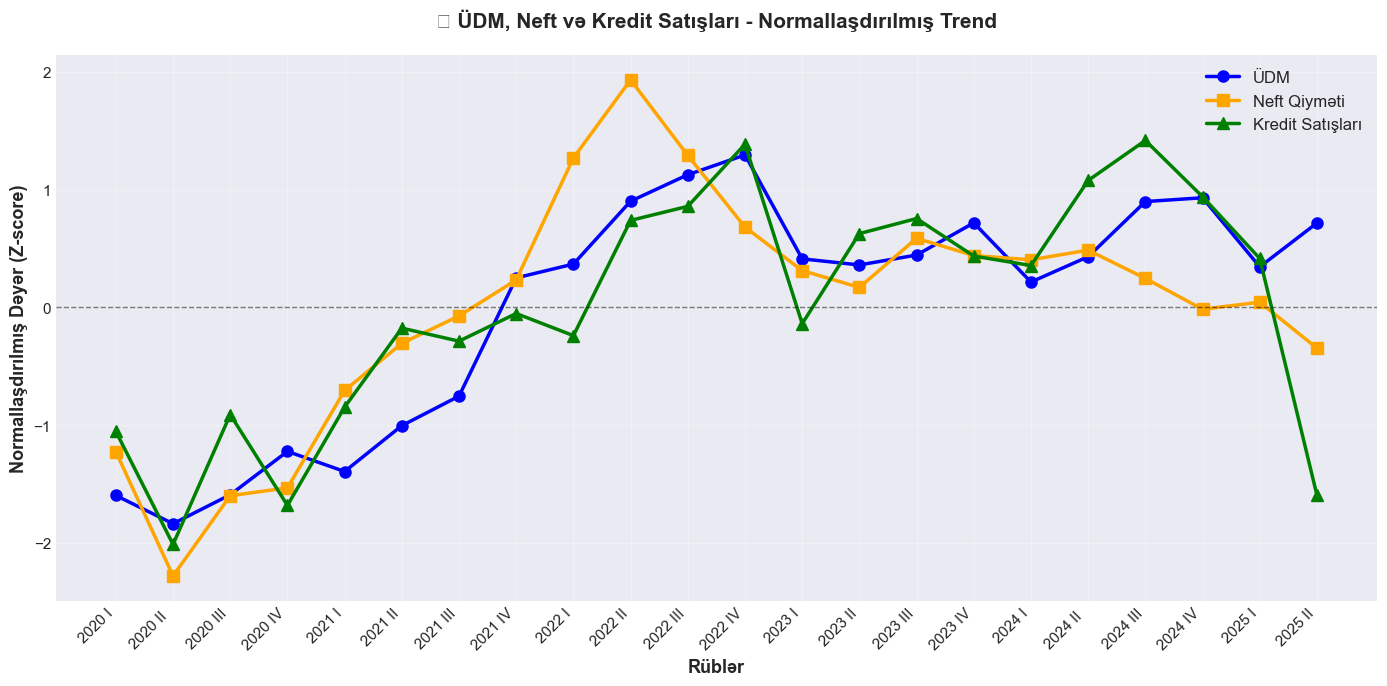


📊 NORMALLAŞDIRILMIŞ TREND ANALİZİ:
   Z-score 0-dan yuxarı = ortalamanın üstündə
   Z-score 0-dan aşağı = ortalamanın altında

💡 MÜŞAHIDƏ: Hər 3 göstəricinin eyni istiqamətdə hərəkət etdiyi görünür


In [ ]:
# Normallaşdırılmış Trend
gdp_norm = (numeric_df['GDP'] - numeric_df['GDP'].mean()) / numeric_df['GDP'].std()
oil_norm = (numeric_df['Oil_Price'] - numeric_df['Oil_Price'].mean()) / numeric_df['Oil_Price'].std()
loans_norm = (numeric_df['Nağd_pul_kredit_satışı'] - numeric_df['Nağd_pul_kredit_satışı'].mean()) / numeric_df['Nağd_pul_kredit_satışı'].std()

# Get quarter labels for x-axis
valid_idx = gdp_norm.dropna().index.intersection(oil_norm.dropna().index).intersection(loans_norm.dropna().index)
quarters_combined = df.loc[valid_idx, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(valid_idx)), gdp_norm.loc[valid_idx], 'b-', linewidth=2.5, marker='o', label='ÜDM', markersize=8)
plt.plot(range(len(valid_idx)), oil_norm.loc[valid_idx], 'orange', linewidth=2.5, marker='s', label='Neft Qiyməti', markersize=8)
plt.plot(range(len(valid_idx)), loans_norm.loc[valid_idx], 'green', linewidth=2.5, marker='^', label='Kredit Satışları', markersize=8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Normallaşdırılmış Dəyər (Z-score)', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM, Neft və Kredit Satışları - Normallaşdırılmış Trend', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_combined)), quarters_combined, rotation=45, ha='right')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 NORMALLAŞDIRILMIŞ TREND ANALİZİ:")
print("   Z-score 0-dan yuxarı = ortalamanın üstündə")
print("   Z-score 0-dan aşağı = ortalamanın altında")
print("\n💡 MÜŞAHIDƏ: Hər 3 göstəricinin eyni istiqamətdə hərəkət etdiyi görünür")

#### 3.3.2 3D Əlaqə: ÜDM × Neft × Kredit

**İzahat:** 3 dəyişən arasındakı əlaqəni eyni vaxtda görmək üçün 3D scatter plot.

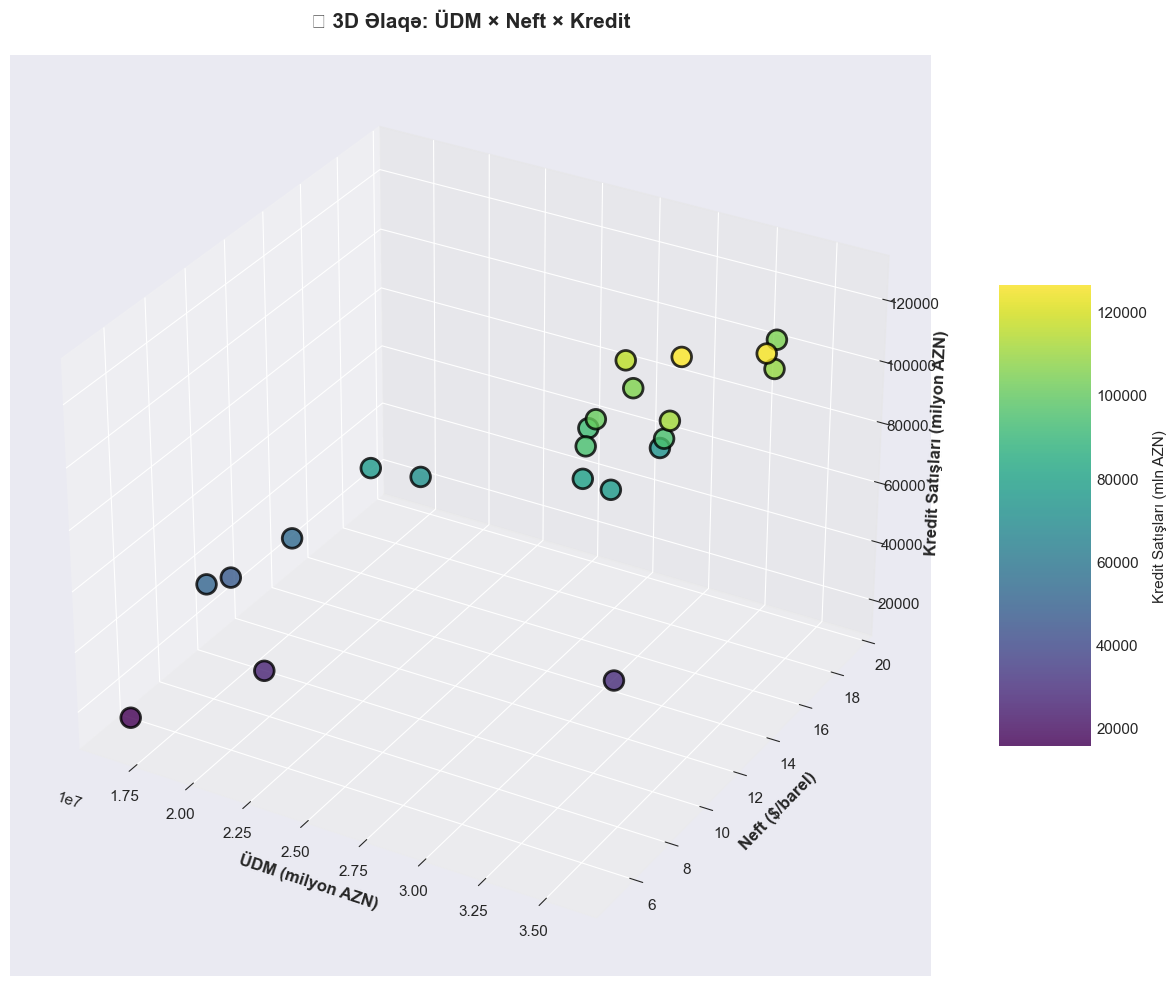


🔮 3D VİZUALİZASİYA:
   Rəng intensivliyi kredit satışlarının həcmini göstərir
   Nöqtələrin yeri ÜDM və neft qiymətinə görə dəyişir


In [ ]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x_data = numeric_df['GDP'].dropna()
y_data = numeric_df['Oil_Price'].dropna() * 100  # $/barel
z_data = numeric_df['Nağd_pul_kredit_satışı'].dropna()

# Uyğun indeksləri götür
valid_idx = x_data.index.intersection(y_data.index).intersection(z_data.index)
x_plot = x_data.loc[valid_idx]
y_plot = y_data.loc[valid_idx]
z_plot = z_data.loc[valid_idx]

scatter = ax.scatter(x_plot, y_plot, z_plot, c=z_plot, cmap='viridis', s=200, 
                       edgecolors='black', linewidth=2, alpha=0.8)
ax.set_xlabel('ÜDM (milyon AZN)', fontsize=12, fontweight='bold')
ax.set_ylabel('Neft ($/barel)', fontsize=12, fontweight='bold')
ax.set_zlabel('Kredit Satışları (milyon AZN)', fontsize=12, fontweight='bold')
ax.set_title('🔮 3D Əlaqə: ÜDM × Neft × Kredit', fontsize=15, fontweight='bold', pad=20)
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, label='Kredit Satışları (mln AZN)')
plt.tight_layout()
plt.show()

print("\n🔮 3D VİZUALİZASİYA:")
print("   Rəng intensivliyi kredit satışlarının həcmini göstərir")
print("   Nöqtələrin yeri ÜDM və neft qiymətinə görə dəyişir")

#### 3.3.3 ÜDM və Neft Birgə Təsir Təhlili

In [ ]:
# Birgə Təsir Təhlili
print("="*100)
print("🔗 ÜDM VƏ NEFT QİYMƏTİNİN BİRGƏ TƏSİRİ")
print("="*100)

# Ssenari təhlili
high_gdp = numeric_df['GDP'] > numeric_df['GDP'].median()
high_oil = numeric_df['Oil_Price'] > numeric_df['Oil_Price'].median()

scenario_both_high = high_gdp & high_oil
scenario_both_low = (~high_gdp) & (~high_oil)
scenario_mixed = (high_gdp & ~high_oil) | (~high_gdp & high_oil)

loans_when_both_high = numeric_df.loc[scenario_both_high, 'Nağd_pul_kredit_satışı'].mean()
loans_when_both_low = numeric_df.loc[scenario_both_low, 'Nağd_pul_kredit_satışı'].mean()
loans_when_mixed = numeric_df.loc[scenario_mixed, 'Nağd_pul_kredit_satışı'].mean()

print(f"\n📊 SSENARİ TƏHLİLİ:\n")
print(f"   🟢 HƏR İKİSİ YÜKSƏK (ÜDM ↑ və Neft ↑):")
print(f"      Dövr sayı:         {scenario_both_high.sum()} rüb")
print(f"      Ortalama satış:    {loans_when_both_high:,.0f} milyon AZN")
print(f"\n   🔴 HƏR İKİSİ AŞAQI (ÜDM ↓ və Neft ↓):")
print(f"      Dövr sayı:         {scenario_both_low.sum()} rüb")
print(f"      Ortalama satış:    {loans_when_both_low:,.0f} milyon AZN")
print(f"\n   🟡 QARIŞIQ (Biri yüksək, biri aşağı):")
print(f"      Dövr sayı:         {scenario_mixed.sum()} rüb")
print(f"      Ortalama satış:    {loans_when_mixed:,.0f} milyon AZN")

if loans_when_both_high > 0 and loans_when_both_low > 0:
    impact = ((loans_when_both_high - loans_when_both_low) / loans_when_both_low) * 100
    print(f"\n💡 BİRGƏ TƏSİR:")
    print(f"   ÜDM və neft hər ikisi yüksək olduqda kredit satışları {impact:+.1f}% daha çoxdur")
    print(f"   Bu, hər iki göstəricinin **sinergik təsirini** göstərir")

# Korrelyasiya
print(f"\n🔗 KORRELYASİYA MÜQAYİSƏSİ:")
print(f"   ÜDM → Kredit:         {correlations['GDP']:+.3f}")
print(f"   Neft → Kredit:        {correlations['Oil_Price']:+.3f}")

gdp_oil_corr = numeric_df[['GDP', 'Oil_Price']].corr().iloc[0, 1]
print(f"   ÜDM ↔ Neft:           {gdp_oil_corr:+.3f}")

if abs(gdp_oil_corr) > 0.7:
    print(f"\n   ⚠️ ÜDM və Neft yüksək korrelyasiyalıdır - eyni dəyişəni ölçə bilərlər")
    print(f"      (Multicollinearity riski var)")
else:
    print(f"\n   ✅ ÜDM və Neft müstəqil məlumat verirlər - hər ikisi vacibdir")

print("="*100)

🔗 ÜDM VƏ NEFT QİYMƏTİNİN BİRGƏ TƏSİRİ

📊 SSENARİ TƏHLİLİ:

   🟢 HƏR İKİSİ YÜKSƏK (ÜDM ↑ və Neft ↑):
      Dövr sayı:         9 rüb
      Ortalama satış:    103,124 milyon AZN

   🔴 HƏR İKİSİ AŞAQI (ÜDM ↓ və Neft ↓):
      Dövr sayı:         13 rüb
      Ortalama satış:    59,371 milyon AZN

   🟡 QARIŞIQ (Biri yüksək, biri aşağı):
      Dövr sayı:         4 rüb
      Ortalama satış:    77,757 milyon AZN

💡 BİRGƏ TƏSİR:
   ÜDM və neft hər ikisi yüksək olduqda kredit satışları +73.7% daha çoxdur
   Bu, hər iki göstəricinin **sinergik təsirini** göstərir

🔗 KORRELYASİYA MÜQAYİSƏSİ:
   ÜDM → Kredit:         +0.777
   Neft → Kredit:        +0.764
   ÜDM ↔ Neft:           +0.837

   ⚠️ ÜDM və Neft yüksək korrelyasiyalıdır - eyni dəyişəni ölçə bilərlər
      (Multicollinearity riski var)
